In [22]:
import numpy as np
import torch

In [23]:
torch.manual_seed(0)
from torchvision import transforms
import torch.nn.functional as F 
from torch import nn
import sys

sys.path.insert(1, '/Users/leonkiesgen/Documents/Python/BA_Optimization_ML/MaschineLearning/visualisation')
import json_ImExport

data=json_ImExport.loadData("/Users/leonkiesgen/Documents/Python/Kappa_variation_vmax70.json")
mean, std = (0.5,), (0.5,)

# Create a transform and normalise data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean, std)
                              ])




In [24]:
class FMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(103,300)
        self.fc2 = nn.Linear(300,200)
        self.fc3 = nn.Linear(200,150)
        self.fc3 = nn.Linear(200,100)

    def forward(self,x):

        x = F.leaky_relu(self.fc1(x),negative_slope=0.05)
        x = F.leaky_relu(self.fc2(x),negative_slope=0.05)
        x = F.leaky_relu(self.fc3(x),negative_slope=0.05)
        x = F.leaky_relu(self.fc4(x),negative_slope=0.05)
        #x= F.log_softmax(x_dim=1)

        return x

In [19]:
model=FMNIST()

def prepareData(data):
    
    prepareddata=[]
    for item in data:
        inpdata=[]
        #print(item)
        #print(item["v_ini"])
        inpdata.append(item["v_ini"])
        inpdata.append(item["v_max"])
        inpdata.append(item["Power"])   
        inpdata.extend(item["Kappa"])

        #print("Input: ",inpdata)
        label=item["V_op"]

        inpdata=torch.Tensor(inpdata)
        label=torch.Tensor(label)

        tupledata=(inpdata,label)
        prepareddata.append((inpdata,label))
    
    return prepareddata


traindata=prepareData(data["list"])





In [25]:
from IPython.core.debugger import set_trace

from torch import optim
criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 10
train_tracker, test_tracker, accuracy_tracker = [], [], []


for i in range(num_epochs):
    cum_loss = 0
    
    for batch, (inp, vel) in enumerate(traindata,1):


        optimizer.zero_grad()
        output = model(inp)
        
        

        loss = criterion(output, vel)
        loss.backward()
        optimizer.step()
        
        cum_loss += loss.item()
        
    print(output)

    train_tracker.append(cum_loss/len(traindata))
    print(f"Epoch({i+1}/{num_epochs}) | Training loss: {cum_loss/len(traindata)} | ",end='')
    '''
    test_loss = 0
    num_correct = 0
    total = 0
    
    for batch, (inp, vel) in enumerate(traindata,1):
        
        output = model(inp)
        batch_loss = criterion(output, vel)        
        test_loss += batch_loss.item()
    

    
    test_tracker.append(test_loss/len(traindata))
    print(f"Test loss: {test_loss/len(traindata)} | ", end='')
    accuracy_tracker.append(num_correct/total)
    print(f'Accuracy : {num_correct/total}')     
    

#print(f'\nNumber correct : {num_correct}, Total : {total}')
#print(f'Accuracy of the model after 30 epochs on the 10000 test images: {num_correct * 100 / total}% ')
    '''
    

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan], grad_fn=<LeakyReluBackward0>)
Epoch(1/10) | Training loss: nan | tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        na

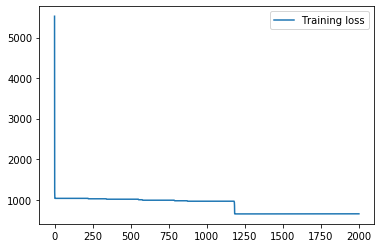

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_tracker, label='Training loss')
#plt.plot(test_tracker, label='Test loss')
plt.legend()

In [10]:
def predict(testexample):
    
    pData=prepareData(testexample)
   # print("pData", pData)
    pData=pData[0]
    pred=model(pData[0])

    #print("Pred:", pred.tolist(), "real: ", d[1])
    %matplotlib inline
    plt.plot(pred.tolist(),label="Pred")
    plt.plot(pData[1].tolist(),label= "Real_Optimizer")

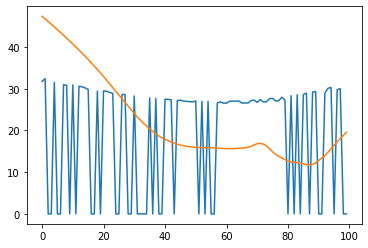

In [13]:
predict([data["list"][10]])